# <center> <font color=red> Task-4: Driver Drowsiness Detection
## <center>  By Madasu Deepika

## <font color=red> **Problem Statement:** </font>
### To  design a driver drowsiness detection  to  prevent  accidents  from  happening  because  of  driver  fatigue  and sleepiness.  

## <font color=red> Dataset:
https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

### Loading the Dataset

In [2]:
TRAIN_DIR = os.path.join('drowsiness-dataset', 'train')
os.listdir(TRAIN_DIR)

['Closed', 'Open', 'yawn', 'no_yawn']

In [3]:
def showRandomSamples(directory, folder):
    fig, ax = plt.subplots(2,2)
    filelist = os.listdir(os.path.join(directory, folder))
    for i in range(2):
        for j in range(2):
            img = cv2.imread(os.path.join(directory, folder, random.choice(filelist)))
            ax[i][j].imshow(img)
            
    fig.suptitle("Random samples from folder: {}".format(folder))
    plt.show()

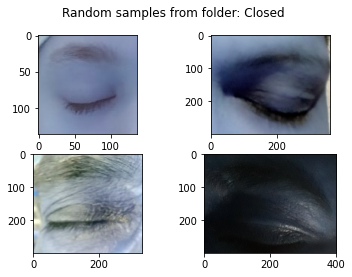

In [4]:
showRandomSamples(TRAIN_DIR, 'Closed')

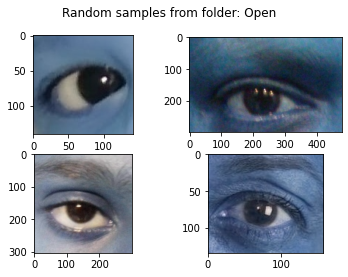

In [5]:
showRandomSamples(TRAIN_DIR, 'Open')

### Generate training data by processing the samples from the dataset

In [6]:
def generate_data():
    labels = ['Closed', 'Open']
    IMG_SIZE = 224
    X = []
    y = []
    for label in labels:
        path = os.path.join(TRAIN_DIR, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                X.append(resized_array)
                y.append(class_num)
            except Exception as e:
                print(e)
    return (X,y)

In [7]:
X,y = generate_data()

0
1


In [8]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

### Train-test split using 30% test-size

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.3)

#### Training data contains 1016 samples and Test data contains 436 samples

In [10]:
print(len(X_train), len(y_train), len(X_test), len(X_test))

1016 1016 436 436


In [11]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [12]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

### Downloading pretrained VGG16 weights

In [13]:
from keras.applications.vgg16 import VGG16
vgg16model = VGG16(include_top = False, input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [14]:
for layer in vgg16model.layers:
    layer.trainable=False
    
vgg16model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Adding our own Dense layers

In [15]:
model = keras.Sequential([
    vgg16model,
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 25)                627225    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 15,341,939
Trainable params: 627,251
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the model for 50 Epochs

In [18]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
32/32 [==============================] - 201s 6s/step - loss: 0.8530 - accuracy: 0.6713 - val_loss: 0.2557 - val_accuracy: 0.9037
Epoch 2/50
32/32 [==============================] - 157s 5s/step - loss: 0.3278 - accuracy: 0.9015 - val_loss: 0.1135 - val_accuracy: 0.9679
Epoch 3/50
32/32 [==============================] - 157s 5s/step - loss: 0.1218 - accuracy: 0.9522 - val_loss: 0.1029 - val_accuracy: 0.9564
Epoch 4/50
32/32 [==============================] - 157s 5s/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 0.0800 - val_accuracy: 0.9725
Epoch 5/50
32/32 [==============================] - 157s 5s/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 0.0668 - val_accuracy: 0.9817
Epoch 6/50
32/32 [==============================] - 157s 5s/step - loss: 0.0764 - accuracy: 0.9748 - val_loss: 0.0584 - val_accuracy: 0.9771
Epoch 7/50
32/32 [==============================] - 157s 5s/step - loss: 0.0730 - accuracy: 0.9747 - val_loss: 0.0701 - val_accuracy: 0.9885
Epoch 8/50
32

### Some important graphs

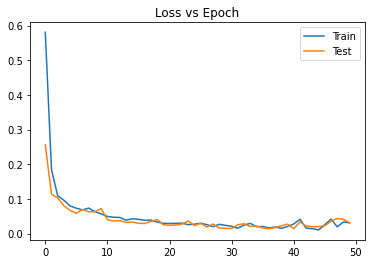

In [19]:
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Test")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

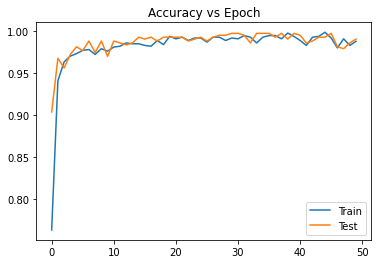

In [20]:
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.show()

### Testing random images from the internet

In [21]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [22]:
from skimage import io
def predictSample(url, cascade=eye_cascade):
    origin = io.imread(url)
    gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray, 1.1, 10)
    for (x, y, w, h) in faces:
            cv2.rectangle(origin, (x,y), (x+w, y+h), (255, 0, 0), 2)
            img = origin[y:y+h, x:x+w].copy()
            if(img.size):
                img = cv2.resize(img, (224,224))
                plt.imshow(img)
                img = img.reshape(1,224,224,3)
                print(model.predict(img))
                
            else:
                print("No eyes")

In [ ]:
img = io.imread('https://www.thestatesman.com/wp-content/uploads/2017/08/1493458748-beauty-face-517.jpg')
cv2.resize(img, (224,224)).shape

(224, 224, 3)

[[1.]]
[[1.]]


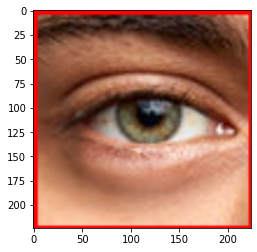

In [ ]:
predictSample('https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_hero-1024x575.jpg')

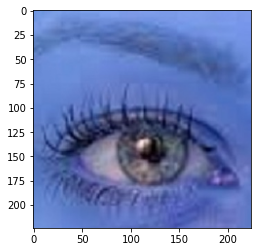

In [ ]:
plt.imshow(X_test[3])

### Saving model to disk to implement in our project

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
def loadmodel(modeljson, modelweights, path):
    json_file = open(os.path.join(path, modeljson), 'r')
    model = json_file.read()
    json_file.close()
    model = keras.models.model_from_json(model)
    model.load_weights(os.path.join(path, modelweights))
    return model


In [ ]:
model = loadmodel('model.json', 'model.h5', './')

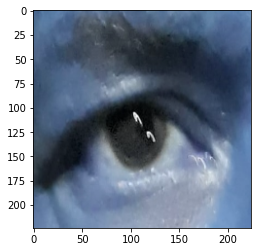

In [ ]:
plt.imshow(X_test[4])

In [ ]:
model.predict(X_test[4].reshape(1,224,224,3))

array([[1.]], dtype=float32)

In [ ]:
predictions = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions[0]

array([1.3344675e-07], dtype=float32)

In [ ]:
predictions_bin = [0 if x < 0.5 else 1 for x in predictions]

In [ ]:
predictions_bin[0]

0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

### Classification report and Confusion matrix

In [ ]:
print(classification_report(y_test, predictions_bin))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       220
           1       1.00      0.96      0.98       216

    accuracy                           0.98       436
   macro avg       0.98      0.98      0.98       436
weighted avg       0.98      0.98      0.98       436



In [ ]:
print(confusion_matrix(y_test, predictions_bin))

[[220   0]
 [  8 208]]
